In [88]:
# Author: Bostjan Cigan
# https://bostjan-cigan.com
# Inspired by from https://towardsdatascience.com/chaos-game-representation-of-a-genetic-sequence-4681f1a67e14

from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
#outmers = file

infasta = '/content/drive/MyDrive/Abf1_sf_90_fps_with_sf_fimo.fasta'

def prep_fasta(fasta):
  
  ff = open(infasta) # A set of FASTA sequences, no size limit (whole genomes acceptable)
  rawfa = ff.read().splitlines()
  fastseq = []
  
  for line in rawfa:
    if not (">" in line):
      fastseq.append(str(line)) # Trims FASTA headers
  
  return fastseq

# Set up values to build the CGR for each sequence

def build_cgr(dnalist, k):
  # Converts a list of DNA sequence strings into their CGR representations
  # for k-mers of the given size
  
  cgrdict = {}
  
  for seq in dnalist:
    
    inseq = str(seq) # The input sequence string
    mls = [] # A list to capture all the kmers of the string
    kcgr = {} # A dictionary to record the points for each kmer
    
    for i in range(len(inseq) - k - 1):
      mer = inseq[i:i+k] # Report the kmers found in the input string
      mls.append(mer) # Record the kmers in a list
    
    for kseq in mls:
      
      maxval = int(math.sqrt(4**k))
      setval = maxval
      px = maxval/2
      py = maxval/2

      for b in kseq:
        xa = ya = xc = yt = 0
        xg = yg = yc = xt = setval
        
        if b == 'A':
          px += xa
          py += ya
        elif b == 'C':
          px += xc
          py += yc
        elif b == 'G':
          px += xg
          py += yg
        elif b == 'T':
          px += xt
          py += yt
        
        px, py = px/2, py/2 # Finish the CGR calc 
        
      kcgr[kseq] = px, py
    
    #if not (seq in cgrdict): # Don't repeat FASTA entries; may be useful sometimes though, not sure
    cgrdict[seq] = kcgr
  
  return cgrdict


In [65]:
def map_cgr(seqdict):
  seqcgrs = {}
  for frag in seqdict.keys():
    kmcgr = seqdict[frag]
    cgrlist = []
    for kmer in kmcgr.keys():
      point = kmcgr[kmer]
      cgrlist.append(point)
    seqcgrs[frag] = cgrlist
  return seqcgrs




In [66]:

def fcgr_plt(cgrdict, binx, biny):
  mapdict = {}
  xlist = []
  ylist = []
  for cgrt in cgrdict.keys():
    pts = cgrdict[cgrt]
    for pt in pts:
      xc = pt[0]
      yc = pt[1]
      xlist.append(xc)
      ylist.append(yc)
    
    freqmap = plt.hist2d(xlist, ylist, bins = (binx, biny), cmap=cm.gray_r)
    mapdict[cgrt] = freqmap
  return mapdict
  

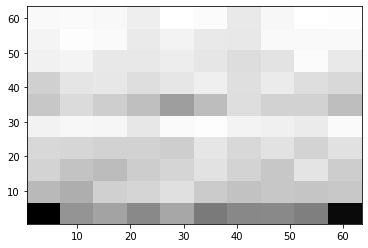

In [99]:

new_seq = prep_fasta(infasta)
cgrdict = build_cgr(new_seq, 6)
ptdict = map_cgr(cgrdict)
fplots = fcgr_plt(ptdict, 10, 10) # Returns a dictionary of sequences and their FCGR graph

In [47]:
print(ptdict.keys())

dict_keys(['CCATCTCAAACTTACCCTACTCTCAGATTCCACTTCACTCCATGGCCCATCTCTCACTGAATCAGTACCAAATGCACTCACATCATTATG', 'CGTACCCCAACCTTTTTTTTTTACTTTTCTTTGGATCTTAGAGATAACAGAAAAAAAGGATGACCCCAATCATTTGCCACGGCATGTCAA', 'GTCCGAGATGATTATCATATTTACACAGCCGTACATACACGTGCCATTTATCTTGATATCATTCTGGACGTATGTGCACATGTGATTTGC', 'TATGGCAACTTTTCACTTTTAGATCAAGTCACTATATACGACTTGAACATCAGAACGGCGATTTTCCATCAAGATGGAGTGGAAACCACG', 'ATTGGTATATCACTACTTGTACAAATATCATATTGTACGATAATCGCGAAGAACGACGCACTGGTGGGAAGAAGTGGAAAACAGAAGCTT', 'GGCACACGATAAAGGTGCACCTTGTGATAATAAGGTGGAAAAATATATATGAAAAAGTGAAATTGATTGTGGCTGCACTAGGACATCATT', 'TCTTATAGCTCATCGATGAAAAAAACGGGCCCTCGTCGCTTGTGATGTGAAAAAATTTTTCAAGCTTTAAGCCCATTGAAAGCAAGAGAT', 'TTTTCTTATGTTTTTTTTTTTCAGGGCGACGTGTCCAATAATATGTATGTTTGTCGCTATGTACGAGATATTATTGCTAAGTGACAGTAA', 'TACCATTATTAAATCACTACAGACGATAATACCCGGAATGCCCTTTTTGCAGGGAAAGCGAAAAAGGTGAAAGAGTTAACAGGAGAAAGT', 'GTCTAAAATATCCATTAATACTGTGCTCAATCAATCGTGTTAGATGATTTAGTTTTTTCCAAATCGTTATTATAGTGCAGAAGTAGTATA', 'CATATACGGTGTTAGAAGATGACGCAAATGATGAGAAATAGTCATCGT

[[86. 27. 23. 30. 13. 30. 31. 16. 16. 20.]
 [51. 43. 40. 25. 14. 25. 22. 18. 11. 13.]
 [42. 34. 41. 29. 15. 29. 22. 18. 13. 18.]
 [61. 19. 28. 39. 26. 42. 23. 19. 13. 27.]
 [39. 21. 29. 31. 15. 40. 25. 17. 19. 15.]
 [50. 36. 22. 24. 12. 36. 22. 18. 20. 15.]
 [59. 38. 30. 30. 18. 20. 30. 27. 21. 21.]
 [46. 41. 25. 17. 17. 27. 15. 22. 19. 23.]
 [51. 35. 22. 25. 15. 34. 23. 14. 15. 12.]
 [74. 32. 36. 29. 16. 40. 33. 21. 18.  9.]]
[[261.  96.  65.  73.  42.  82.  74.  49.  46.  33.]
 [123. 107. 108.  67.  43.  70.  55.  38.  32.  29.]
 [121.  77. 103.  77.  39.  78.  60.  47.  36.  34.]
 [149.  59.  68.  73.  56. 110.  66.  46.  41.  57.]
 [116.  60.  70.  77.  36. 109.  59.  40.  39.  31.]
 [150.  85.  69.  49.  32.  90.  50.  54.  55.  31.]
 [142.  93.  71.  67.  42.  62.  67.  67.  65.  44.]
 [144.  94.  76.  46.  43.  67.  39.  47.  40.  43.]
 [149.  79.  67.  68.  46.  68.  52.  34.  39.  28.]
 [249.  77.  83.  62.  36.  92.  75.  46.  39.  28.]]


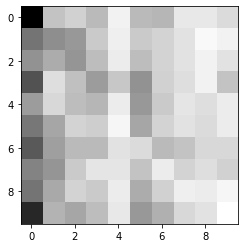

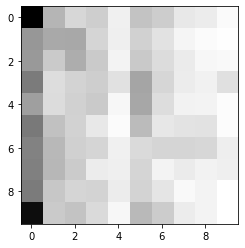

In [101]:
fpt1 = fplots['GGTGTGTTTGTTCATATCACGGCATACGTTAACACAATGTAAATCTTGCTTTGGGTTGACTGAGGGAAATAACTATAGACATCACACCAA']
fpt2 = fplots['TACTCAAGACCCGTGCAGATCACTATTACACTCATTATTACAAGTCATTGAGAACGAAATTTTGACATCATTACTAATAATGTTACTCAT']

print(fpt1[0])
print(fpt2[0])

pt1 = pylab.imshow(fpt1[0], interpolation='nearest', cmap=cm.gray_r)
pylab.show(pt1)
pt2 = pylab.imshow(fpt2[0], interpolation='nearest', cmap=cm.gray_r)
pylab.show(pt2)